## Data Loading And Description 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
from scipy.stats import chi2_contingency
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split , cross_val_score , GridSearchCV

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import  xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier , AdaBoostClassifier
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score , recall_score , f1_score


In [5]:
df = pd.read_csv('train.csv')
df.head()

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,0,0,5,100,great recipe! I have made them just as written...
1,72,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,1622717852,0,0,1,5,100,This is an easy and quick recipe that is great...
2,458,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_206522,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,jeannem32,1,1622717357,0,0,0,3,100,I think I was looking for something extra spec...
3,7,50,100276,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_434088,u_1oKZCQcKQZdQhDVBS7oISc216VA,ds422,1,1622648899,0,0,0,5,100,This is our favorite grilled chicken recipe. ...
4,60,12,19731,Cauliflower Soup,sp_aUSaElGf_19731_c_387011,u_1oKd4sudZQPgu6YALiC7bW7mKMs,SusanHoward,1,1622718260,0,0,0,4,100,Great basic recipe. I added 2 teaspoons Tuscan...


In [178]:
df['Recipe_Review'][2]


'I think I was looking for something extra special in this soup, but it wasn&#39;t there--quite a bit of work for something that tasted merely average.'

## Information of Data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13636 entries, 0 to 13635
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 13636 non-null  int64 
 1   RecipeNumber       13636 non-null  int64 
 2   RecipeCode         13636 non-null  int64 
 3   RecipeName         13636 non-null  object
 4   CommentID          13636 non-null  object
 5   UserID             13636 non-null  object
 6   UserName           13636 non-null  object
 7   UserReputation     13636 non-null  int64 
 8   CreationTimestamp  13636 non-null  int64 
 9   ReplyCount         13636 non-null  int64 
 10  ThumbsUpCount      13636 non-null  int64 
 11  ThumbsDownCount    13636 non-null  int64 
 12  Rating             13636 non-null  int64 
 13  BestScore          13636 non-null  int64 
 14  Recipe_Review      13634 non-null  object
dtypes: int64(10), object(5)
memory usage: 1.6+ MB


#### From our data we notice that , mostly our data is of numerical type
#### Only Recipe_Review Column Contain Null Values

# Descriptive Statistics

In [7]:
df.describe()

,ID,RecipeNumber,RecipeCode,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore
count,13636.000000,13636.000000,13636.000000,13636.000000,1.363600e+04,13636.000000,13636.000000,13636.000000,13636.000000,13636.000000
mean,121.085289,38.624377,21785.990833,2.160311,1.623713e+09,0.014520,1.098269,0.543708,4.288721,153.127897
std,116.995633,29.672351,23883.189918,10.086424,5.444020e+06,0.137323,4.166487,3.265660,1.544839,140.986908
min,0.000000,1.000000,386.000000,0.000000,1.613035e+09,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,12.000000,6504.000000,1.000000,1.622717e+09,0.000000,0.000000,0.000000,5.000000,100.000000
50%,91.000000,33.000000,14600.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
75%,148.000000,63.000000,33121.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
max,724.000000,100.000000,191775.000000,510.000000,1.665756e+09,3.000000,80.000000,126.000000,5.000000,946.000000


#### From the stats , Rating is the score 1 to 5 scale that user gave to the recipe.
#### Goal of the project is to predict the rating of the recipe based on features , makes a multiclassification problem

# Exploratory Data Analysis

In [8]:
df['Rating'].value_counts()

Rating
5    10371
0     1272
4     1241
3      368
1      210
2      174
Name: count, dtype: int64

<Axes: xlabel='Rating'>

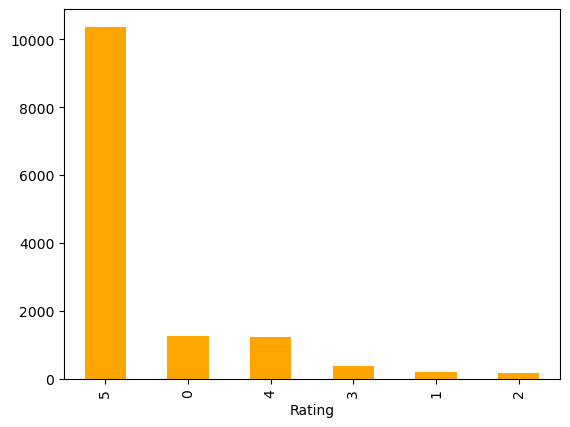

In [9]:
df['Rating'].value_counts().plot(kind = 'bar' , color = 'Orange')

In [10]:
df['RecipeName'].value_counts()

RecipeName
Cheeseburger Soup             553
Creamy White Chili            483
Best Ever Banana Bread        372
Enchilada Casser-Ole!         313
Basic Homemade Bread          307
                             ... 
Cheeseburger Paradise Soup     68
Lime Chicken Tacos             65
Caramel Heavenlies             64
Blueberry French Toast         64
Vegetarian Linguine            19
Name: count, Length: 100, dtype: int64

In [11]:
df['UserReputation'].value_counts()

UserReputation
1      12708
10       478
20       217
0        118
30        54
50        16
40        12
90         7
80         4
60         4
110        3
510        3
100        3
140        2
70         2
220        1
160        1
130        1
150        1
300        1
Name: count, dtype: int64

<Axes: xlabel='UserReputation'>

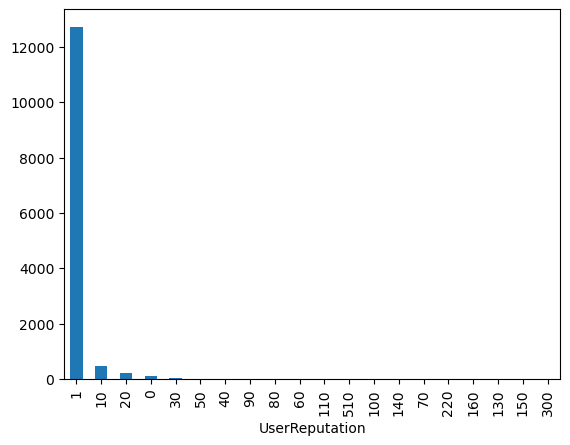

In [12]:
df['UserReputation'].value_counts().plot(kind = 'bar')

In [13]:
df['UserName'].value_counts()

UserName
mjlouk               21
2124arizona          20
No_Time_To_Cook      20
grandmascooking22    19
justmbeth            18
                     ..
Melinda174            1
manncw408             1
grandmaomaha          1
geojac                1
morgantowndan         1
Name: count, Length: 10620, dtype: int64

In [14]:
df['ReplyCount'].value_counts()

ReplyCount
0    13464
1      151
2       16
3        5
Name: count, dtype: int64

<Axes: xlabel='ReplyCount'>

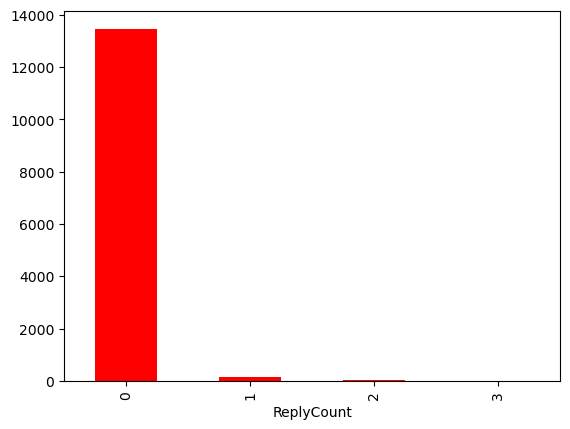

In [15]:
df['ReplyCount'].value_counts().plot(kind = 'bar' , color = 'red')

In [16]:
numerical_col = ['RecipeNumber','UserReputation','ReplyCount','ThumbsUpCount','ThumbsDownCount','Rating','BestScore']

In [17]:


corr_matrix = df[numerical_col].corr()
corr_matrix

,RecipeNumber,UserReputation,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore
RecipeNumber,1.000000,0.022084,0.026537,0.064797,0.053027,-0.043127,0.086233
UserReputation,0.022084,1.000000,0.014045,0.053825,0.023986,0.015038,0.126701
ReplyCount,0.026537,0.014045,1.000000,0.220929,0.293614,-0.124860,0.210352
ThumbsUpCount,0.064797,0.053825,0.220929,1.000000,0.392564,-0.051752,0.693532
ThumbsDownCount,0.053027,0.023986,0.293614,0.392564,1.000000,-0.142273,0.227341
Rating,-0.043127,0.015038,-0.124860,-0.051752,-0.142273,1.000000,-0.036719
BestScore,0.086233,0.126701,0.210352,0.693532,0.227341,-0.036719,1.000000


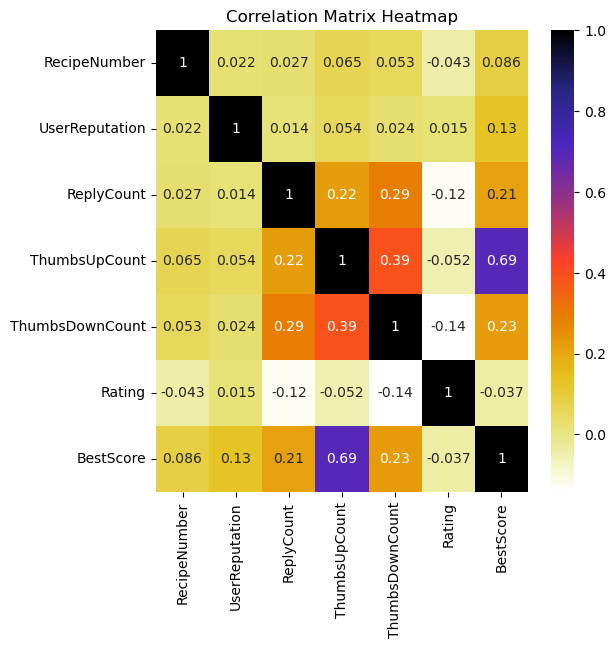

In [18]:
plt.figure(figsize = (6, 6))
sns.heatmap(corr_matrix , annot = True , cmap = plt.cm.CMRmap_r)
plt.title("Correlation Matrix Heatmap")
plt.show()

#### Rating columns has postive corr with UserReputaion and negative corr with other columns like BestScore , ThumbsUpcount

#### There is a little multicollineaity between the column BestScore and ThumbsUpscore

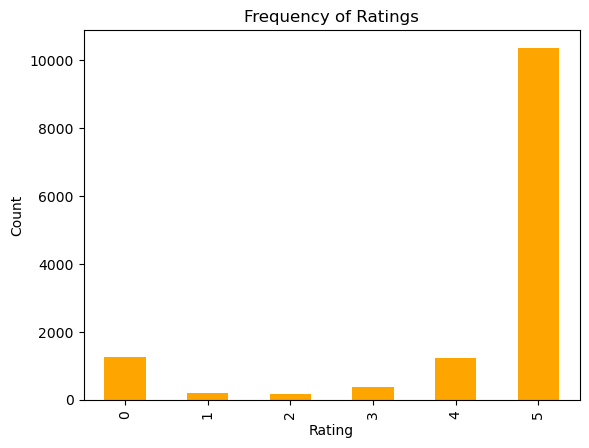

In [19]:
import matplotlib.pyplot as plt

df['Rating'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Frequency of Ratings')
plt.show()


#### we can see that  here our data in highly imbalane , 10000 cases  of 5 ratings and other have less ratings 

C:\Users\Parveen\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


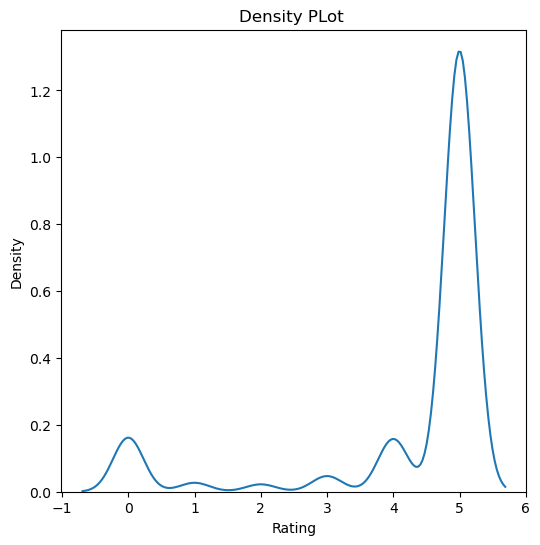

In [20]:
plt.figure(figsize = (6, 6))
sns.kdeplot(x = df['Rating'] , data = df)
plt.title("Density PLot ")
plt.show()

# Hypothesis Testing

In [21]:

# Does the Rating Columns Has Association With ThumbsUp Column
# NUll Hypothesis ---> Rating column doest not have the association with ThumbsUp column


Thumbsup_table = pd.crosstab(df['Rating'] , df['ThumbsUpCount'])

Thumbsup_table

# perform chi2 test
chi2, pval, degrees_of_freedom, expected_counts = chi2_contingency(Thumbsup_table)

print(f"Chi-Square-Statistics :{chi2}")
print(f"P-value : {pval}")


if (pval < 0.05):
    print("Reject Null Hypothesis , there is significant association betweeen Rating and ThumbsUp column")
else:
    print("Fail to reject Null Hypothesis , there is no evidence to support that there is association between Rating and ThumbsUp column")
    

Chi-Square-Statistics :350.0596539404753
P-value : 0.0027853743505593
Reject Null Hypothesis , there is significant association betweeen Rating and ThumbsUp column


In [22]:
# Does The Rating Column Has Association With UserReputation Column

UserReputation_table =  pd.crosstab(df['Rating'] , df['UserReputation'])
UserReputation_table

#perform chi-sqaure test
chi2, pval, degrees_of_freedom, expected_counts = chi2_contingency(UserReputation_table)

print(f"Chi-Square-Statistics : {chi2}")
print(f"P-value : {pval}")

if(pval < 0.05):
    print("Reject Null Hypothesis , there is significant association between Rating and UserReputation Column")
else:
    print('Failed to reject Null Hypothesis , there is no evidence to support that there is association between Rating and UserReputation columns')
    
    

Chi-Square-Statistics : 120.24256935374322
P-value : 0.041126549940447066
Reject Null Hypothesis , there is significant association between Rating and UserReputation Column


In [23]:
# Does The Rating Column Has Association With ReplyCount Column

Reply_table =  pd.crosstab(df['Rating'] , df['ReplyCount'])
Reply_table

#perform chi-sqaure test
chi2, pval, degrees_of_freedom, expected_counts = chi2_contingency(Reply_table)

print(f"Chi-Square-Statistics : {chi2}")
print(f"P-value : {pval}")

if(pval < 0.05):
    print("Reject Null Hypothesis , there is significant association between Rating and ReplyCount Column")
else:
    print('Failed to reject Null Hypothesis , there is no evidence to support that there is association between Rating and ReplyCount columns')
    

Chi-Square-Statistics : 279.87546940289235
P-value : 8.370622405816982e-51
Reject Null Hypothesis , there is significant association between Rating and ReplyCount Column


In [24]:
# Does The Rating Column Has Association With ThumbsDownCount Column

ThumbsDown_table =  pd.crosstab(df['Rating'] , df['ThumbsDownCount'])
ThumbsDown_table

#perform chi-sqaure test
chi2, pval, degrees_of_freedom, expected_counts = chi2_contingency(ThumbsDown_table)

print(f"Chi-Square-Statistics : {chi2}")
print(f"P-value : {pval}")

if(pval < 0.05):
    print("Reject Null Hypothesis , there is significant association between Rating and ThumbsDownCount Column")
else:
    print('Failed to reject Null Hypothesis , there is no evidence to support that there is association between Rating and ThumbsDownCount columns')
    

Chi-Square-Statistics : 2554.229936808455
P-value : 0.0
Reject Null Hypothesis , there is significant association between Rating and ThumbsDownCount Column


# Feature Cleaning

## Data Cleaning

In [25]:
# Null Values
df.isnull().sum()

ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
Rating               0
BestScore            0
Recipe_Review        2
dtype: int64

In [26]:
df.isnull().sum() / len(df) *100

ID                   0.000000
RecipeNumber         0.000000
RecipeCode           0.000000
RecipeName           0.000000
CommentID            0.000000
UserID               0.000000
UserName             0.000000
UserReputation       0.000000
CreationTimestamp    0.000000
ReplyCount           0.000000
ThumbsUpCount        0.000000
ThumbsDownCount      0.000000
Rating               0.000000
BestScore            0.000000
Recipe_Review        0.014667
dtype: float64

#### we can see that Recipe_Review Column has only very few missing values , so we can drop them

In [27]:
df.dropna(inplace = True)

In [28]:
df.shape

(13634, 15)

## Drop Unnecessary Columns

In [29]:
df.sample(1)

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
13246,408,2,3309,Best Ever Banana Bread,sp_aUSaElGf_3309_c_367222,u_1oKWuj6MdrzLpPSfF48p03USajY,weluvckg,1,1622718185,0,0,0,5,100,"We&#39;ve made this several times, and we love..."


In [30]:
df.drop(columns = ['ID' , 'RecipeNumber' , 'RecipeCode' , 'CommentID' , 'UserID' , 'UserName' , 'CreationTimestamp'] , inplace = True)

In [31]:
df.sample(5)

,RecipeName,UserReputation,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
193,Winning Apple Crisp,1,0,0,0,3,100,Very good!
12325,Comforting Chicken Noodle Soup,1,0,1,0,5,193,Love this soup. I am teaching my son to cook a...
532,Caramel-Pecan Cheesecake Pie,1,0,0,0,1,100,"My pie did not turn out as expected, was very ..."
6147,Chocolate Guinness Cake,10,0,0,0,5,100,By far one of the BEST cakes ever. Moist &amp...
1680,Enchilada Casser-Ole!,1,0,0,0,5,100,Not ony did I use ground turkey... I also used...


In [32]:
df['UserReputation'].dtype

dtype('int64')

C:\Users\Parveen\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


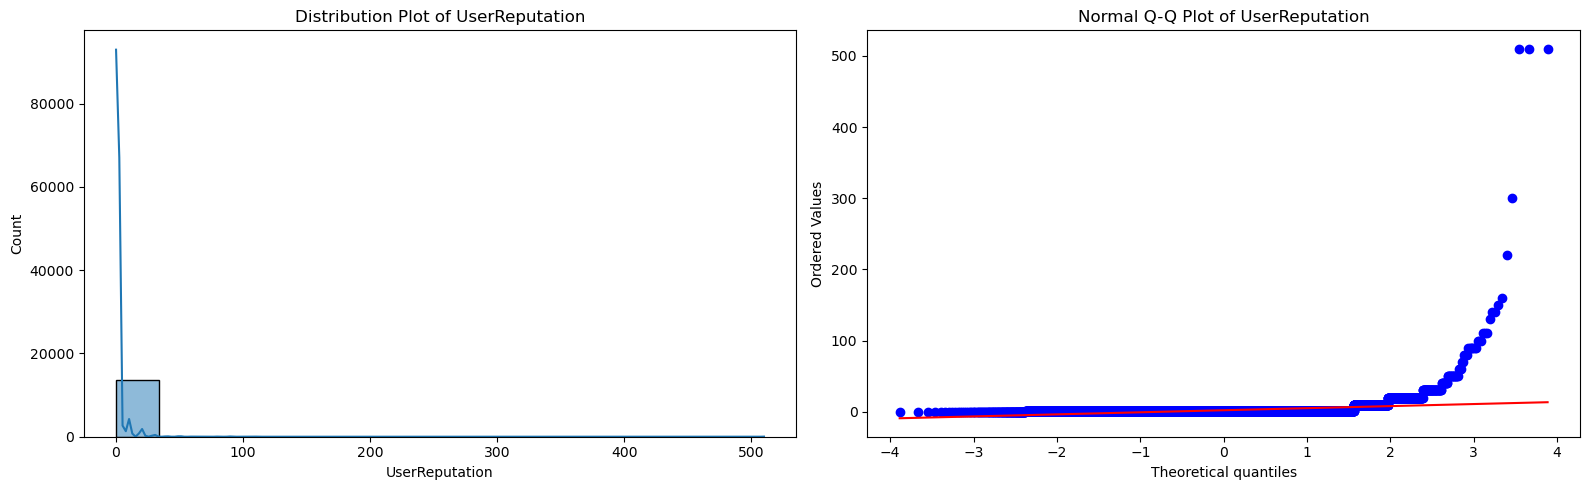

C:\Users\Parveen\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


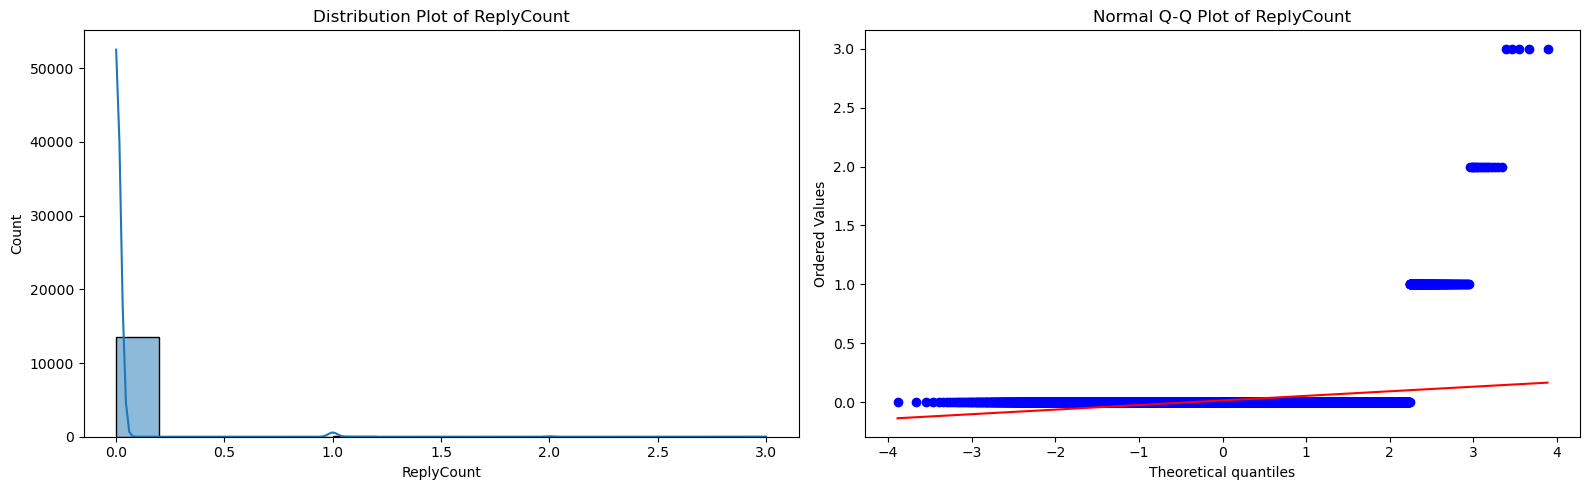

C:\Users\Parveen\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


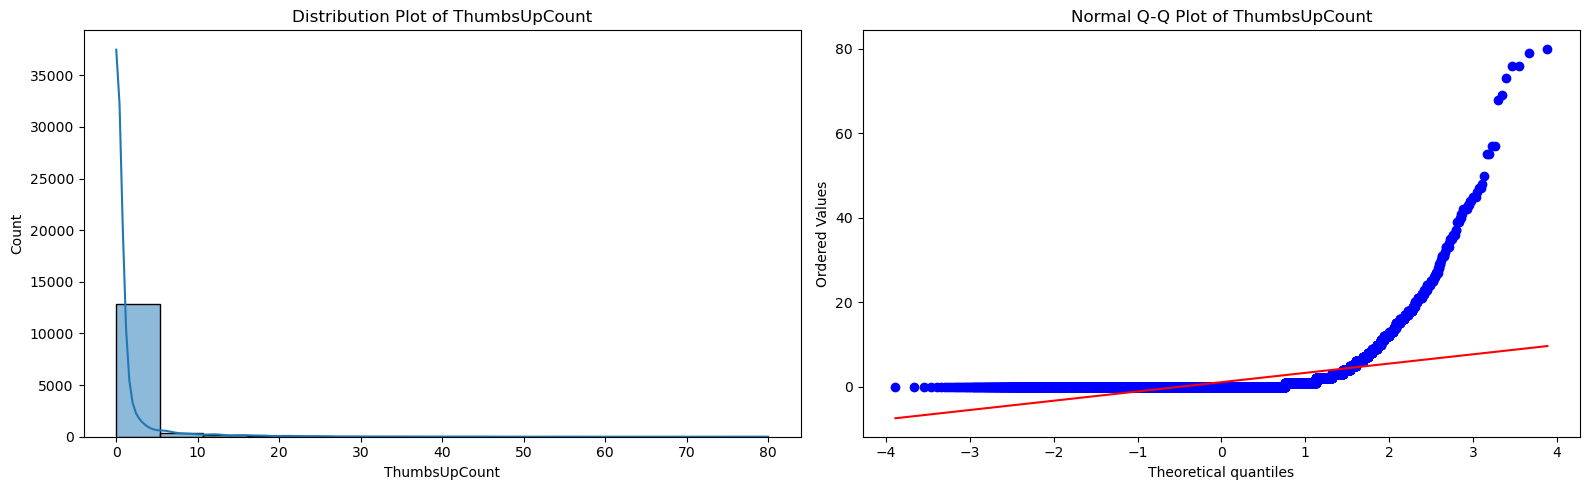

C:\Users\Parveen\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


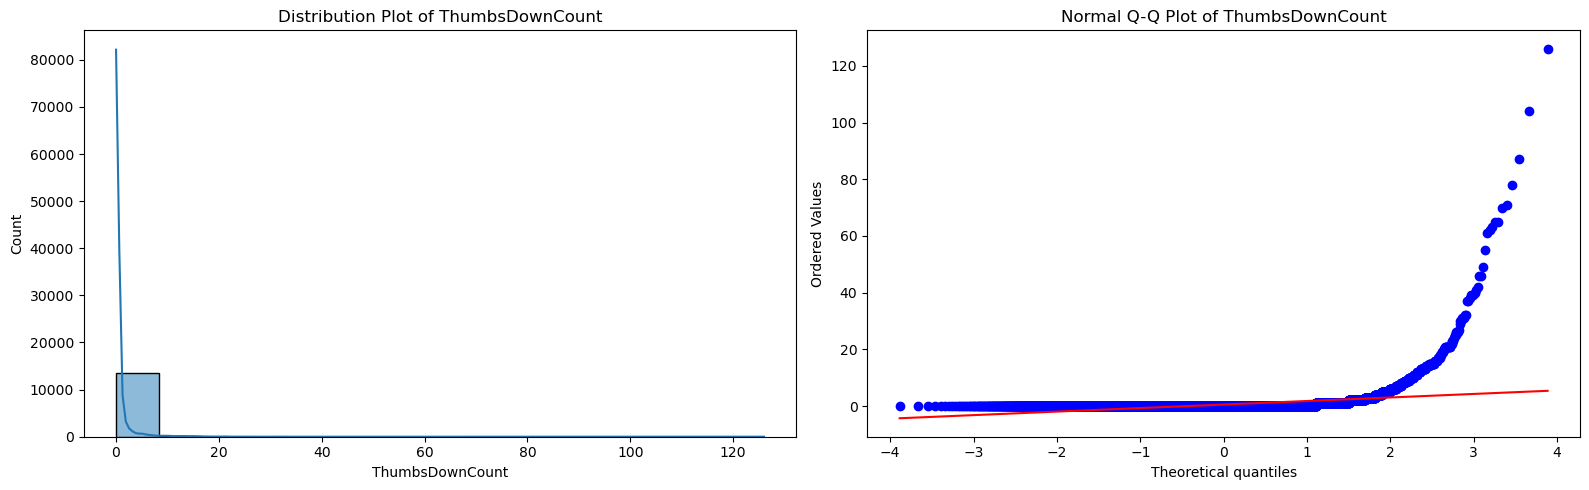

C:\Users\Parveen\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


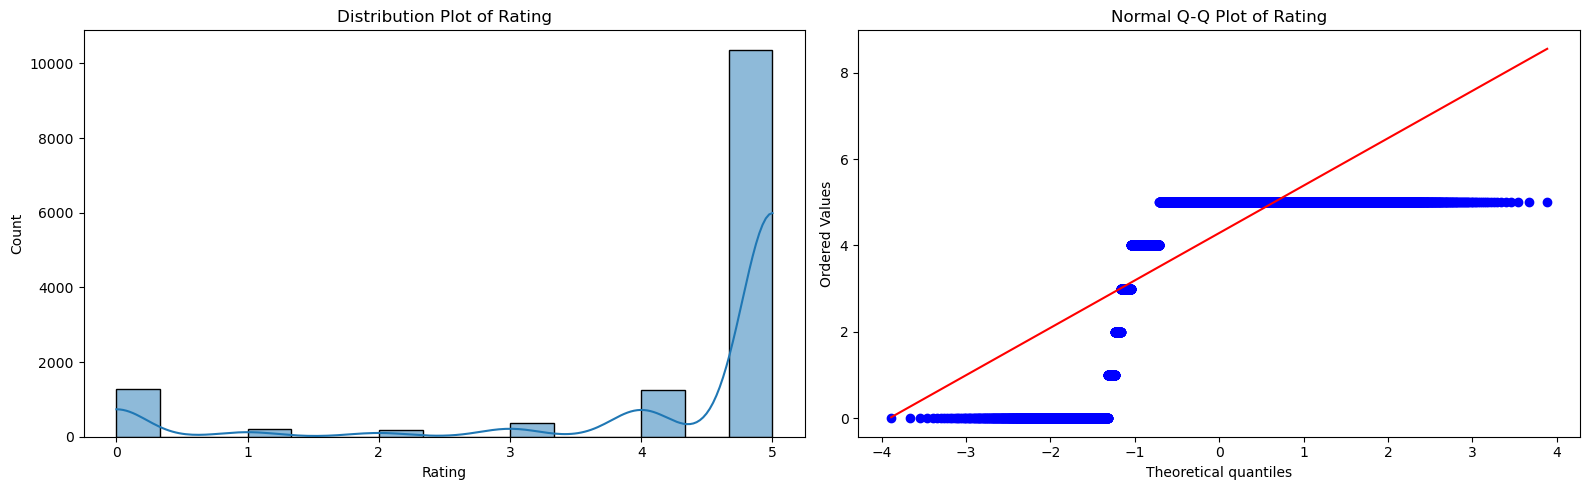

C:\Users\Parveen\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


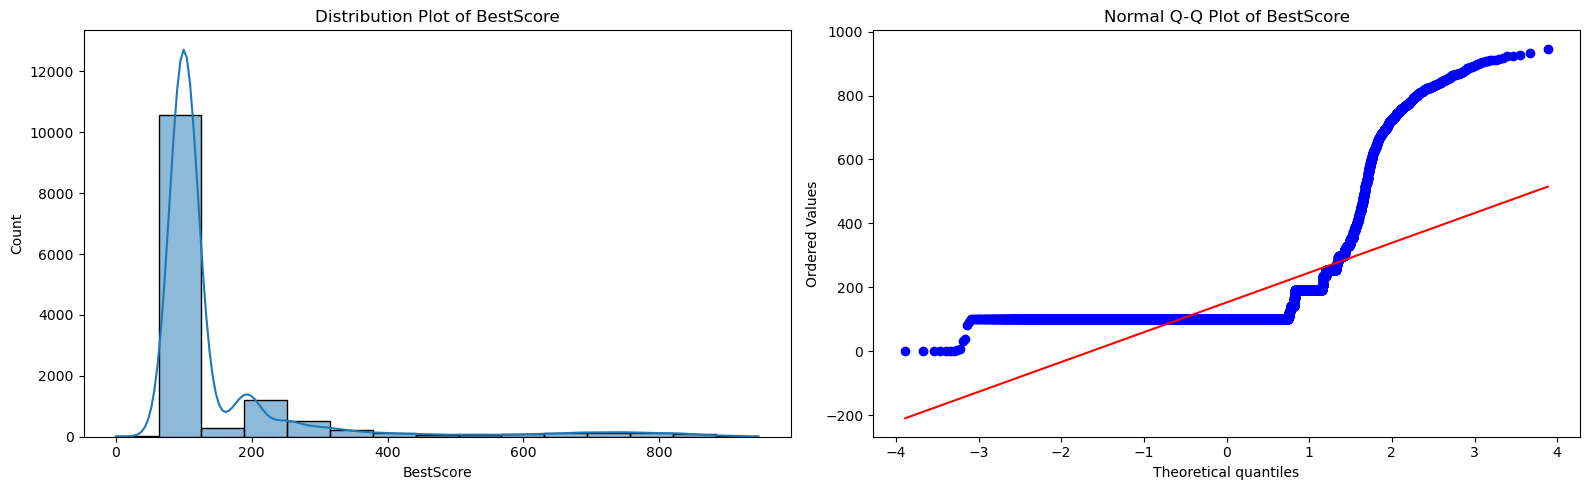

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

numerical_col = ['UserReputation', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount', 'Rating', 'BestScore']

for col in numerical_col:
    plt.figure(figsize=(16, 5))
    
    # Distribution plot
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)  # Replaced deprecated `sns.distplot` with `sns.histplot`
    plt.title(f'Distribution Plot of {col}')
    
    # Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[col], dist='norm', plot=plt)
    plt.title(f'Normal Q-Q Plot of {col}')
    
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()


## Feature Scaling 



#### We use TfIfdf for text data 
#### And for Numerical data first we to have to use the distribution of the data , whether it is normal or not , if normal we use standard scaler , else use minmaxscaler

In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
    

In [35]:
X = df.drop(columns = ['Rating'] , axis = 1)
y = df['Rating']

In [36]:
ct = ColumnTransformer([
    ('Scaler', StandardScaler() , ['UserReputation' , 'ReplyCount' , 'ThumbsUpCount' ,'ThumbsDownCount' , 'BestScore']),
    ('Vectorizer1' , TfidfVectorizer() , 'RecipeName'),
    ('Vectorizer2' , TfidfVectorizer() , 'Recipe_Review')
])

## Train_Test_Split

In [37]:
X_train , X_test , y_train, y_test = train_test_split(X, y , test_size = 0.2 , random_state = 42)

In [38]:
print(X_train.shape)
print(y_train.shape)
y_train = y_train.values.ravel()

(10907, 7)
(10907,)


# Model Building  Logistic Regression

In [39]:

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter = 1000)

In [40]:
from sklearn.pipeline import Pipeline


In [41]:
pipe = Pipeline([
    ('Preprocessing' , ct),
    ('lr' , lr)
])

In [42]:
ml_pipeline = pipe.fit(X_train , y_train)

In [43]:
ml_pipeline

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('Scaler', StandardScaler(),
                                                  ['UserReputation',
                                                   'ReplyCount',
                                                   'ThumbsUpCount',
                                                   'ThumbsDownCount',
                                                   'BestScore']),
                                                 ('Vectorizer1',
                                                  TfidfVectorizer(),
                                                  'RecipeName'),
                                                 ('Vectorizer2',
                                                  TfidfVectorizer(),
                                                  'Recipe_Review')])),
                ('lr', LogisticRegression(max_iter=1000))])

In [44]:
Preprocessing = pipe.named_steps['Preprocessing']
Preprocessing


X_transformed = Preprocessing.transform(X_train)

# Inspect transformed data
print("Transformed Data:")
print(X_transformed[:5])


feature_names = Preprocessing.get_feature_names_out()
feature_names

Transformed Data:
  (0, 0)	-0.118609792273805
  (0, 1)	-0.10693915229242651
  (0, 2)	-0.2661092076460053
  (0, 3)	-0.16416346657399283
  (0, 4)	-0.3740901393678576
  (0, 7)	0.5329590345028496
  (0, 29)	0.4362277828934359
  (0, 48)	0.7250241299251133
  (0, 382)	0.24597991051683396
  (0, 394)	0.12651008362537788
  (0, 725)	0.19100440135781196
  (0, 774)	0.11485923419648099
  (0, 780)	0.0846491626105719
  (0, 850)	0.1888186661644859
  (0, 1106)	0.09337175685382916
  (0, 1164)	0.18281220371345946
  (0, 1252)	0.2874694449180651
  (0, 1427)	0.13881742156485927
  (0, 1509)	0.07767778648791641
  (0, 1514)	0.1285827149398436
  (0, 1574)	0.18373325903701826
  (0, 1592)	0.10121568914798963
  (0, 3238)	0.12244184752033914
  (0, 3380)	0.1516394727911652
  (0, 3683)	0.15294818118031525
  :	:
  (3, 9379)	0.04385072303507646
  (3, 9470)	0.10200294842181179
  (4, 0)	-0.118609792273805
  (4, 1)	-0.10693915229242651
  (4, 2)	-0.2661092076460053
  (4, 3)	-0.16416346657399283
  (4, 4)	-0.3740901393678576
 

array(['Scaler__UserReputation', 'Scaler__ReplyCount',
       'Scaler__ThumbsUpCount', ..., 'Vectorizer2__zuchini',
       'Vectorizer2__zuchinni', 'Vectorizer2__zuke'], dtype=object)

In [45]:
ml_pipeline.score(X_test, y_test)

0.7814448111477814

## Cross Validation

In [46]:
from sklearn.model_selection import  cross_val_score , cross_val_predict 

In [47]:
from sklearn.metrics import confusion_matrix

In [48]:
y_train_lr = cross_val_predict(ml_pipeline , X_train , y_train , cv =3)

In [49]:
cm = confusion_matrix(y_train_lr , y_train)
cm

array([[ 159,   23,    9,   19,   23,   94],
       [   5,   17,   11,    6,    1,    1],
       [   1,    1,    0,    0,    1,    0],
       [   4,    7,   10,   18,    5,    2],
       [  15,    7,   27,   58,   86,   64],
       [ 850,  114,   77,  189,  877, 8126]], dtype=int64)

## Model Evaluation on Test Data

In [50]:
from sklearn.metrics import accuracy_score

In [51]:
y_pred_lr = ml_pipeline.predict(X_test)
accuracy_score_lr = accuracy_score(y_test , y_pred_lr)
accuracy_score_lr

0.7814448111477814

## Hyperparameter Tuning

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
param_grid_lr = {
     'lr__C': [0.01, 0.1, 1],
    'lr__solver': ['lbfgs', 'newton-cg','liblinear'],
}

In [54]:
grid_search_lr = GridSearchCV(ml_pipeline , cv = 5 , scoring = 'accuracy' , param_grid = param_grid_lr , verbose = True)

In [55]:
grid_search_lr.fit(X_train , y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Preprocessing',
                                        ColumnTransformer(transformers=[('Scaler',
                                                                         StandardScaler(),
                                                                         ['UserReputation',
                                                                          'ReplyCount',
                                                                          'ThumbsUpCount',
                                                                          'ThumbsDownCount',
                                                                          'BestScore']),
                                                                        ('Vectorizer1',
                                                                         TfidfVectorizer(),
                                                                         'RecipeName'),
                                                                        ('Vectorizer2',
                                                                         TfidfVectorizer(),
                                                                         'Recipe_Review')])),
                                       ('lr',
                                        LogisticRegression(max_iter=1000))]),
             param_grid={'lr__C': [0.01, 0.1, 1],
                         'lr__solver': ['lbfgs', 'newton-cg', 'liblinear']},
             scoring='accuracy', verbose=True)

In [56]:
best_params_lr=grid_search_lr.best_params_
best_params_lr

{'lr__C': 1, 'lr__solver': 'liblinear'}

In [57]:
grid_search_lr.best_estimator_

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('Scaler', StandardScaler(),
                                                  ['UserReputation',
                                                   'ReplyCount',
                                                   'ThumbsUpCount',
                                                   'ThumbsDownCount',
                                                   'BestScore']),
                                                 ('Vectorizer1',
                                                  TfidfVectorizer(),
                                                  'RecipeName'),
                                                 ('Vectorizer2',
                                                  TfidfVectorizer(),
                                                  'Recipe_Review')])),
                ('lr',
                 LogisticRegression(C=1, max_iter=1000, solver='liblinear'))])

In [58]:
cvres=grid_search_lr.cv_results_
for accuracy,params in zip(cvres["mean_test_score"],cvres["params"]):
  print(accuracy,params)

0.7610708430571332 {'lr__C': 0.01, 'lr__solver': 'lbfgs'}
0.7610708430571332 {'lr__C': 0.01, 'lr__solver': 'newton-cg'}
0.7611625861378432 {'lr__C': 0.01, 'lr__solver': 'liblinear'}
0.7639130294086375 {'lr__C': 0.1, 'lr__solver': 'lbfgs'}
0.7639130294086375 {'lr__C': 0.1, 'lr__solver': 'newton-cg'}
0.762079470605021 {'lr__C': 0.1, 'lr__solver': 'liblinear'}
0.7719811252164872 {'lr__C': 1, 'lr__solver': 'lbfgs'}
0.772347887408588 {'lr__C': 1, 'lr__solver': 'newton-cg'}
0.7726232427291613 {'lr__C': 1, 'lr__solver': 'liblinear'}


In [59]:
lr_clf_tuned=LogisticRegression(random_state=42,C=1,solver='lbfgs',penalty='l2',max_iter=1000)

In [60]:
lr_pipeline_tuned= Pipeline(
    [
        ("preprocessing", ct),
        ("lr", lr_clf_tuned),
    ]
)

In [61]:
lr_pipeline_tuned.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('Scaler', StandardScaler(),
                                                  ['UserReputation',
                                                   'ReplyCount',
                                                   'ThumbsUpCount',
                                                   'ThumbsDownCount',
                                                   'BestScore']),
                                                 ('Vectorizer1',
                                                  TfidfVectorizer(),
                                                  'RecipeName'),
                                                 ('Vectorizer2',
                                                  TfidfVectorizer(),
                                                  'Recipe_Review')])),
                ('lr',
                 LogisticRegression(C=1, max_iter=1000, random_state=42))])

In [62]:
y_pred_lr = lr_pipeline_tuned.predict(X_test)

In [63]:
accuracy_score_lr = accuracy_score(y_test , y_pred_lr)
accuracy_score_lr

0.7814448111477814

In [64]:
import pickle

# Save model
with open('lr_tuned.pkl', 'wb') as f:
    pickle.dump(lr_pipeline_tuned ,  f)


In [65]:
import pickle

# Save model
with open('lr_tuned.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
    

print("Model Loaded")


Model Loaded


# Model Building  Support Vector Machine

In [67]:
from sklearn.svm import SVC

In [68]:
svm  = SVC()

In [69]:
svm_pipeline = Pipeline([
    ('Preprocessor' , ct),
    ('svm' , svm ),
])

In [70]:
param_distributions = {
    'svm__C': [0.1, 1, 10],}  # Regularization parameter



In [71]:
param_grid_svm = {'svm__C': [0.01,0.1,1]}

In [72]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [73]:
grid_search_svm = GridSearchCV(estimator = svm_pipeline , cv = 3 , scoring = 'accuracy' , param_grid = param_grid_svm , verbose = True)

In [74]:
random_search_svm1 = RandomizedSearchCV(estimator = svm_pipeline , cv = 3 , scoring = 'accuracy' , param_distributions = param_grid_svm)

In [75]:
grid_search_svm.fit(X_train, y_train)


Fitting 3 folds for each of 3 candidates, totalling 9 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('Preprocessor',
                                        ColumnTransformer(transformers=[('Scaler',
                                                                         StandardScaler(),
                                                                         ['UserReputation',
                                                                          'ReplyCount',
                                                                          'ThumbsUpCount',
                                                                          'ThumbsDownCount',
                                                                          'BestScore']),
                                                                        ('Vectorizer1',
                                                                         TfidfVectorizer(),
                                                                         'RecipeName'),
                                                                        ('Vectorizer2',
                                                                         TfidfVectorizer(),
                                                                         'Recipe_Review')])),
                                       ('svm', SVC())]),
             param_grid={'svm__C': [0.01, 0.1, 1]}, scoring='accuracy',
             verbose=True)

In [76]:
grid_search_svm.best_params_

{'svm__C': 1}

In [77]:
svm= SVC(kernel='linear',C= 1, probability=True)

In [78]:
svm_pipeline = Pipeline([
    ('Preprocessor' , ct),
    ('svm' , svm),
])

In [79]:
acc_svm_train = np.mean(cross_val_score(svm_pipeline, X_train, y_train, cv=3, scoring='accuracy'))
acc_svm_train

0.7729899033002795

In [80]:
svm_pipeline.fit(X_train , y_train)

Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(transformers=[('Scaler', StandardScaler(),
                                                  ['UserReputation',
                                                   'ReplyCount',
                                                   'ThumbsUpCount',
                                                   'ThumbsDownCount',
                                                   'BestScore']),
                                                 ('Vectorizer1',
                                                  TfidfVectorizer(),
                                                  'RecipeName'),
                                                 ('Vectorizer2',
                                                  TfidfVectorizer(),
                                                  'Recipe_Review')])),
                ('svm', SVC(C=1, kernel='linear', probability=True))])

In [81]:
y_pred_svm = svm_pipeline.predict(X_test)
accuracy_score_lr = accuracy_score(y_test , y_pred_svm)
accuracy_score_lr

0.784011734506784

In [82]:
conf_mat_svm_val=confusion_matrix(y_test,y_pred_svm)
conf_mat_svm_val

array([[  38,    3,    2,    2,    2,  191],
       [   2,   13,    2,    3,    0,   21],
       [   1,    2,    2,    9,    2,   24],
       [   7,    0,    2,   11,    5,   53],
       [   9,    2,    0,    2,   10,  225],
       [  13,    1,    0,    1,    3, 2064]], dtype=int64)

In [246]:
import pickle

# Save model
with open('svm_pipeline.pkl', 'wb') as f:
    pickle.dump(svm_pipeline ,  f)


In [66]:
import pickle

# load model
with open('svm_pipeline.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

print('Model Loaded')

Model Loaded


#  Model Building Decision Tree

In [84]:
from sklearn.tree import DecisionTreeClassifier

In [85]:
dt = DecisionTreeClassifier()

In [86]:
dt_pipeline = Pipeline([
    ('Preprocessor' , ct),
    ('dt' , dt)
])

In [87]:
 param_grid= {
     'dt__max_depth': [7,5],
     'dt__min_samples_split': [5,10,8],
     'dt__min_samples_leaf': [10,9,8],
     'dt__criterion' :['gini', 'entropy', 'log_loss']
 }

In [88]:
grid_search_dt = GridSearchCV(estimator = dt_pipeline , param_grid = param_grid , cv= 3  , scoring = 'accuracy')

In [89]:
grid_search_dt.fit(X_train , y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('Preprocessor',
                                        ColumnTransformer(transformers=[('Scaler',
                                                                         StandardScaler(),
                                                                         ['UserReputation',
                                                                          'ReplyCount',
                                                                          'ThumbsUpCount',
                                                                          'ThumbsDownCount',
                                                                          'BestScore']),
                                                                        ('Vectorizer1',
                                                                         TfidfVectorizer(),
                                                                         'RecipeName'),
                                                                        ('Vectorizer2',
                                                                         TfidfVectorizer(),
                                                                         'Recipe_Review')])),
                                       ('dt', DecisionTreeClassifier())]),
             param_grid={'dt__criterion': ['gini', 'entropy', 'log_loss'],
                         'dt__max_depth': [7, 5],
                         'dt__min_samples_leaf': [10, 9, 8],
                         'dt__min_samples_split': [5, 10, 8]},
             scoring='accuracy')

In [90]:
grid_search_dt.best_params_

{'dt__criterion': 'entropy',
 'dt__max_depth': 5,
 'dt__min_samples_leaf': 10,
 'dt__min_samples_split': 5}

In [91]:
grid_search_dt.best_estimator_

Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(transformers=[('Scaler', StandardScaler(),
                                                  ['UserReputation',
                                                   'ReplyCount',
                                                   'ThumbsUpCount',
                                                   'ThumbsDownCount',
                                                   'BestScore']),
                                                 ('Vectorizer1',
                                                  TfidfVectorizer(),
                                                  'RecipeName'),
                                                 ('Vectorizer2',
                                                  TfidfVectorizer(),
                                                  'Recipe_Review')])),
                ('dt',
                 DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                        min_samples_leaf=10,
                                        min_samples_split=5))])

In [92]:
dt = DecisionTreeClassifier(criterion= "entropy", max_depth= 5,min_samples_leaf =10,min_samples_split= 5)

In [93]:
dt_pipeline = Pipeline([
    ('Preprocessor' , ct),
    ('dt' , dt)
])

In [94]:
dt_pipeline = dt_pipeline.fit(X_train , y_train)
dt_pipeline

Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(transformers=[('Scaler', StandardScaler(),
                                                  ['UserReputation',
                                                   'ReplyCount',
                                                   'ThumbsUpCount',
                                                   'ThumbsDownCount',
                                                   'BestScore']),
                                                 ('Vectorizer1',
                                                  TfidfVectorizer(),
                                                  'RecipeName'),
                                                 ('Vectorizer2',
                                                  TfidfVectorizer(),
                                                  'Recipe_Review')])),
                ('dt',
                 DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                        min_samples_leaf=10,
                                        min_samples_split=5))])

In [95]:
y_pred_dt = dt_pipeline.predict(X_test)
accuracy_score_dt = accuracy_score(y_test , y_pred_dt)
accuracy_score_dt

0.7609094242757609

In [96]:
acc_dt_train = np.mean(cross_val_score(dt_pipeline, X_train, y_train, cv=3, scoring='accuracy'))
acc_dt_train

0.7619879709199715

In [97]:
conf_mat_dt_val=confusion_matrix(y_test,y_pred_dt)
conf_mat_dt_val

array([[   7,    9,    0,    1,    2,  219],
       [   3,    4,    1,    4,    0,   29],
       [   3,    1,    0,    0,    0,   36],
       [   4,    1,    0,    1,    2,   70],
       [   2,    3,    1,    2,    0,  240],
       [  11,    3,    0,    5,    0, 2063]], dtype=int64)

In [264]:
import pickle

# Save model
with open('dt_pipeline.pkl', 'wb') as f:
    pickle.dump(dt_pipeline ,  f)


In [83]:
import pickle

# load model
with open('dt_pipeline.pkl', 'rb') as f:
    loaded_model = pickle.load(f)
    
print('Model Loaded')    
    

Model Loaded


# Model Building RandomForest

In [99]:
from sklearn.ensemble import RandomForestClassifier

In [100]:
rf = RandomForestClassifier()

In [101]:
rf_pipeline = Pipeline([
    ('preprocessing', ct),
    ('rf', rf)
])

In [102]:
param_grid = {
    'rf__criterion': ['gini', 'entropy', 'log_loss'],  # Correct quotes and syntax
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [None, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__max_features': ['sqrt', 'log2' ,None],
    
}


In [103]:
from sklearn.model_selection import RandomizedSearchCV
random_search_rf = RandomizedSearchCV(estimator=rf_pipeline , param_distributions=param_grid, 
                                   n_iter=10, cv=5, scoring='accuracy', verbose=1)



In [104]:
random_search_rf.fit(X_train , y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('Scaler',
                                                                               StandardScaler(),
                                                                               ['UserReputation',
                                                                                'ReplyCount',
                                                                                'ThumbsUpCount',
                                                                                'ThumbsDownCount',
                                                                                'BestScore']),
                                                                              ('Vectorizer1',
                                                                               TfidfVectorizer(),
                                                                               'RecipeName'),
                                                                              ('Vectorizer2',
                                                                               TfidfVectorizer(),
                                                                               'Recipe_Review')])),
                                             ('rf', RandomForestClassifier())]),
                   param_distributions={'rf__criterion': ['gini', 'entropy',
                                                          'log_loss'],
                                        'rf__max_depth': [None, 10, 20, 30],
                                        'rf__max_features': ['sqrt', 'log2',
                                                             None],
                                        'rf__min_samples_leaf': [1, 2, 4],
                                        'rf__min_samples_split': [2, 5, 10],
                                        'rf__n_estimators': [100, 200, 300]},
                   scoring='accuracy', verbose=1)

In [105]:
random_search_rf.best_params_

{'rf__n_estimators': 100,
 'rf__min_samples_split': 5,
 'rf__min_samples_leaf': 1,
 'rf__max_features': None,
 'rf__max_depth': 20,
 'rf__criterion': 'entropy'}

In [106]:
random_search_rf.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('Scaler', StandardScaler(),
                                                  ['UserReputation',
                                                   'ReplyCount',
                                                   'ThumbsUpCount',
                                                   'ThumbsDownCount',
                                                   'BestScore']),
                                                 ('Vectorizer1',
                                                  TfidfVectorizer(),
                                                  'RecipeName'),
                                                 ('Vectorizer2',
                                                  TfidfVectorizer(),
                                                  'Recipe_Review')])),
                ('rf',
                 RandomForestClassifier(criterion='entropy', max_depth=20,
                                        max_features=None,
                                        min_samples_split=5))])

In [107]:
rf_clf  = RandomForestClassifier(n_estimators = 200,
  min_samples_split=  2,
  min_samples_leaf =  2,
  max_features =  None,
  max_depth = 30,
  criterion = 'entropy')

In [108]:
rf_pipeline = Pipeline([
    ('Preprocessor' , ct),
    ('rf_clf' , rf_clf)
])

In [109]:
rf_pipeline.fit(X_train , y_train)

Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(transformers=[('Scaler', StandardScaler(),
                                                  ['UserReputation',
                                                   'ReplyCount',
                                                   'ThumbsUpCount',
                                                   'ThumbsDownCount',
                                                   'BestScore']),
                                                 ('Vectorizer1',
                                                  TfidfVectorizer(),
                                                  'RecipeName'),
                                                 ('Vectorizer2',
                                                  TfidfVectorizer(),
                                                  'Recipe_Review')])),
                ('rf_clf',
                 RandomForestClassifier(criterion='entropy', max_depth=30,
                                        max_features=None, min_samples_leaf=2,
                                        n_estimators=200))])

In [110]:
y_pred_rf = rf_pipeline.predict(X_test)
accuracy_score_rf = accuracy_score(y_test , y_pred_rf)
accuracy_score_rf

0.7697103043637697

In [111]:
feature_importances = rf_clf.feature_importances_
feature_importances

array([0.0009582 , 0.00090887, 0.0054336 , ..., 0.        , 0.        ,
       0.        ])

In [112]:
print("Number of features in X:", len(X.columns))
print("Length of feature_importances:", len(feature_importances))


Number of features in X: 7
Length of feature_importances: 9615


In [249]:
import pickle

# Save model
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(xgb_pipeline ,  f)


In [98]:
import pickle

# Load the saved model
with open('rf_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

print("Model loaded successfully!")

Model loaded successfully!


# Stacking Classifier

In [120]:
from sklearn.ensemble import StackingClassifier

In [121]:
estimators = [
    ('svm' , svm_pipeline),
    ('lr' , lr_pipeline_tuned),
    ('rf' , rf_pipeline),
]

In [122]:
stack_clf = StackingClassifier(estimators = estimators , final_estimator = LogisticRegression(random_state = 42 , max_iter = 1000),cv = 3)

In [123]:
stack_clf.fit(X_train , y_train)

StackingClassifier(cv=3,
                   estimators=[('svm',
                                Pipeline(steps=[('Preprocessor',
                                                 ColumnTransformer(transformers=[('Scaler',
                                                                                  StandardScaler(),
                                                                                  ['UserReputation',
                                                                                   'ReplyCount',
                                                                                   'ThumbsUpCount',
                                                                                   'ThumbsDownCount',
                                                                                   'BestScore']),
                                                                                 ('Vectorizer1',
                                                                                  TfidfVectorizer(),
                                                                                  'RecipeName'),
                                                                                 ('Vectorizer2',
                                                                                  TfidfVectorizer(),
                                                                                  'Recipe_Review')])),
                                                ('svm',
                                                 SVC(C=1, kernel='linear',
                                                     probab...
                                                                                   'ReplyCount',
                                                                                   'ThumbsUpCount',
                                                                                   'ThumbsDownCount',
                                                                                   'BestScore']),
                                                                                 ('Vectorizer1',
                                                                                  TfidfVectorizer(),
                                                                                  'RecipeName'),
                                                                                 ('Vectorizer2',
                                                                                  TfidfVectorizer(),
                                                                                  'Recipe_Review')])),
                                                ('rf_clf',
                                                 RandomForestClassifier(criterion='entropy',
                                                                        max_depth=30,
                                                                        max_features=None,
                                                                        min_samples_leaf=2,
                                                                        n_estimators=200))]))],
                   final_estimator=LogisticRegression(max_iter=1000,
                                                      random_state=42))

In [126]:

y_pred_stack=stack_clf.predict(X_test)

accuracy_stack=accuracy_score(y_test,y_pred_stack)
print("Accuracy score for stack_clf is:",accuracy_stack)

Accuracy score for stack_clf is: 0.7869453612027869


In [127]:
import joblib

# Save the trained stacking classifier
joblib.dump(stack_clf, 'stacking_classifier.pkl')



['stacking_classifier.pkl']

# Comparison Between Models(LR Vs. Stacking)

In [144]:
from sklearn.metrics import accuracy_score , precision_score, recall_score , f1_score

In [150]:
accuracy_lr  = accuracy_score(y_test , y_pred_lr )
precision_lr = precision_score(y_test , y_pred_lr , average = 'weighted')
recall_lr = recall_score(y_test , y_pred_lr , average = 'weighted')
f1_lr = f1_score(y_test , y_pred_lr , average = 'weighted')

In [151]:
accuracy_stack  = accuracy_score(y_test , y_pred_stack)
precision_stack = precision_score(y_test , y_pred_stack , average = 'weighted')
recall_stack = recall_score(y_test , y_pred_stack , average = 'weighted')
f1_stack = f1_score(y_test , y_pred_stack , average = 'weighted')

C:\Users\Parveen\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


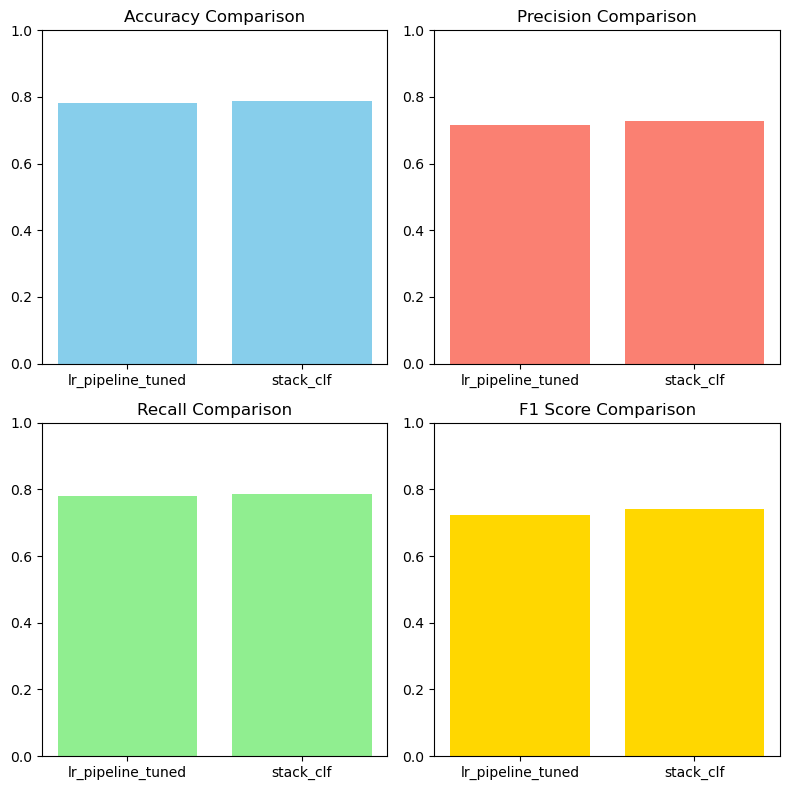

In [152]:
models = ['lr_pipeline_tuned', 'stack_clf']

# metric scores for both models
accuracy_scores = [accuracy_lr, accuracy_stack]
precision_scores = [precision_lr, precision_stack]
recall_scores = [recall_lr,recall_stack]
f1_scores = [f1_lr, f1_stack]


# Plotting comparison bar chart
fig, ax = plt.subplots(2, 2, figsize=(8,8))

ax[0, 0].bar(models, accuracy_scores, color='skyblue')
ax[0, 0].set_title('Accuracy Comparison')
ax[0, 0].set_ylim([0, 1])

ax[0, 1].bar(models, precision_scores, color='salmon')
ax[0, 1].set_title('Precision Comparison')
ax[0, 1].set_ylim([0, 1])

ax[1, 0].bar(models, recall_scores, color='lightgreen')
ax[1, 0].set_title('Recall Comparison')
ax[1, 0].set_ylim([0, 1])

ax[1, 1].bar(models, f1_scores, color='gold')
ax[1, 1].set_title('F1 Score Comparison')
ax[1, 1].set_ylim([0, 1])

plt.tight_layout()
plt.show()

# Testing

In [155]:
df_test=pd.read_csv("test.csv")
df_test.head()

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore,Recipe_Review
0,86,45,41384,Black Bean ‘n’ Pumpkin Chili,sp_aUSaElGf_41384_c_341929,u_1oKc4U6bh65cEli8Z8eTIf98Vpr,kalloween,1,1622718043,0,0,0,100,This was so good!! The pumpkin was perfect as...
1,102,53,3143,Pumpkin Bars,sp_aUSaElGf_3143_c_274545,u_1oKW5seFLQMSwAeOfBVmwJizy5D,chocolate desert,1,1622717685,0,0,1,100,"So good! Could not stop eating them, so bad...."
2,156,53,3143,Pumpkin Bars,sp_aUSaElGf_3143_c_398512,u_1oKZ6GUIAIol8xe6oEI7t1Mpxdz,Vantreesta,1,1622718307,0,0,0,100,I use a small ladle to fill muffin cups.
3,18,89,1324,Porcupine Meatballs,sp_aUSaElGf_1324_c_431662,u_1oKWCP33NVk4Osfpu4VJuIckEF0,Roberta L.Beauchamp,1,1622648872,0,4,3,212,I made this and followed the instructions as d...
4,27,70,32264,Easy Chicken Enchiladas,sp_aUSaElGf_32264_c_423935,u_1oKVhIJMuUlrSCVkbO1jheVTol8,fhquilting,1,1622718460,0,0,1,100,Very Good! I used corn tortillas. Used fresh...


In [156]:
df_test.drop(columns=['ID','RecipeNumber','RecipeCode','CommentID','UserID','UserName','CreationTimestamp'],inplace=True)

In [157]:
df_test.head()

,RecipeName,UserReputation,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore,Recipe_Review
0,Black Bean ‘n’ Pumpkin Chili,1,0,0,0,100,This was so good!! The pumpkin was perfect as...
1,Pumpkin Bars,1,0,0,1,100,"So good! Could not stop eating them, so bad...."
2,Pumpkin Bars,1,0,0,0,100,I use a small ladle to fill muffin cups.
3,Porcupine Meatballs,1,0,4,3,212,I made this and followed the instructions as d...
4,Easy Chicken Enchiladas,1,0,0,1,100,Very Good! I used corn tortillas. Used fresh...


In [170]:
import pandas as pd

# Example data
data = {
    'ID': [1, 2, 3, 4, 5],  # Sample IDs
    'Rating': [5, 4, 3, 5, 2]  # Sample Ratings
}

# Create a DataFrame
sample = pd.DataFrame(data)

print(sample)


   ID  Rating
0   1       5
1   2       4
2   3       3
3   4       5
4   5       2


In [171]:
X_test.shape

(4546, 7)

In [172]:
y_test_predict_lr=ml_pipeline.predict(X_test)

In [174]:
submission = pd.DataFrame({
                  "ID" : range(1,4547),
                  "Rating" : ml_pipeline.predict(X_test)
 })

In [175]:
submission

,ID,Rating
0,1,5
1,2,5
2,3,5
3,4,0
4,5,5
...,...,...
4541,4542,5
4542,4543,5
4543,4544,5
4544,4545,1
